A stock Exploratory Data Analysis (EDA) project involves cleaning, visualizing, and analyzing historical stock market data (such as Open, Close, High, Low, and Volume) to uncover underlying patterns, trends, and relationships. It is the essential "getting to know your data" phase that precedes building machine learning models or making investment decisions

In [ ]:
!pip install yfinance
import yfinance as yf 
import pandas as pd
from statsmodels.graphics import tsaplots 
import matplotlib.pyplot as plts
import seaborn as sns
import matplotlib.dates as mdates

In [33]:
def download(stock):  
    df = yf.download(
         [stock],
         start="2017-01-01",
         end="2026-01-01",
         group_by="ticker",
         auto_adjust=False, 
         progress=False)
            
    df = df.round(4)
    df.insert(loc=0, column='Company', value=stock) 
    return df


# Download Apple dataframe
df_AAPL = download('AAPL')  
# Download Amazon dataframe      
df_AMZN = download('AMZN')   
# Download Google dataframe    
df_GOOGL = download('GOOGL')     
# Download Meta dataframe 
df_FB = download('META')    
# Download Microsoft dataframe        
df_MSFT = download('MSFT')       

stock_list={'Apple': df_AAPL, 'Amazon': df_AMZN, 'Google': df_GOOGL, 'Meta': df_FB, 'Microsoft': df_MSFT}

In [35]:
def info(stock, df):
    print(f'{stock}\'s Historical Data: \n\n {df} \n\n')
    print(f'{stock}\'s Column Information: \n')
    print(df.info(),'\n\n')
    print(f'{stock}\'s Statistic Summary: \n\n {df.describe().round(4)}')
    print('-'*75)
    print()


print(info('Apple', df_AAPL))
print(info('Amazon', df_AMZN))
print(info('Google', df_GOOGL))
print(info('Meta', df_FB))
print(info('Microsoft', df_MSFT))

Apple's Historical Data: 

 Ticker     Company      AAPL                                          \
Price                   Open      High       Low     Close Adj Close   
Date                                                                   
2017-01-03    AAPL   28.9500   29.0825   28.6900   29.0375   26.7459   
2017-01-04    AAPL   28.9625   29.1275   28.9375   29.0050   26.7159   
2017-01-05    AAPL   28.9800   29.2150   28.9525   29.1525   26.8518   
2017-01-06    AAPL   29.1950   29.5400   29.1175   29.4775   27.1511   
2017-01-09    AAPL   29.4875   29.8575   29.4850   29.7475   27.3998   
...            ...       ...       ...       ...       ...       ...   
2025-12-24    AAPL  272.3400  275.4300  272.2000  273.8100  273.5540   
2025-12-26    AAPL  274.1600  275.3700  272.8600  273.4000  273.1444   
2025-12-29    AAPL  272.6900  274.3600  272.3500  273.7600  273.5041   
2025-12-30    AAPL  272.8100  274.0800  272.2800  273.0800  272.8247   
2025-12-31    AAPL  273.0600  273.68

In [56]:
company_to_ticker = {
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Google': 'GOOGL',
    'Amazon': 'AMZN',
    'Meta': 'META', 
    # Add your other companies here
}

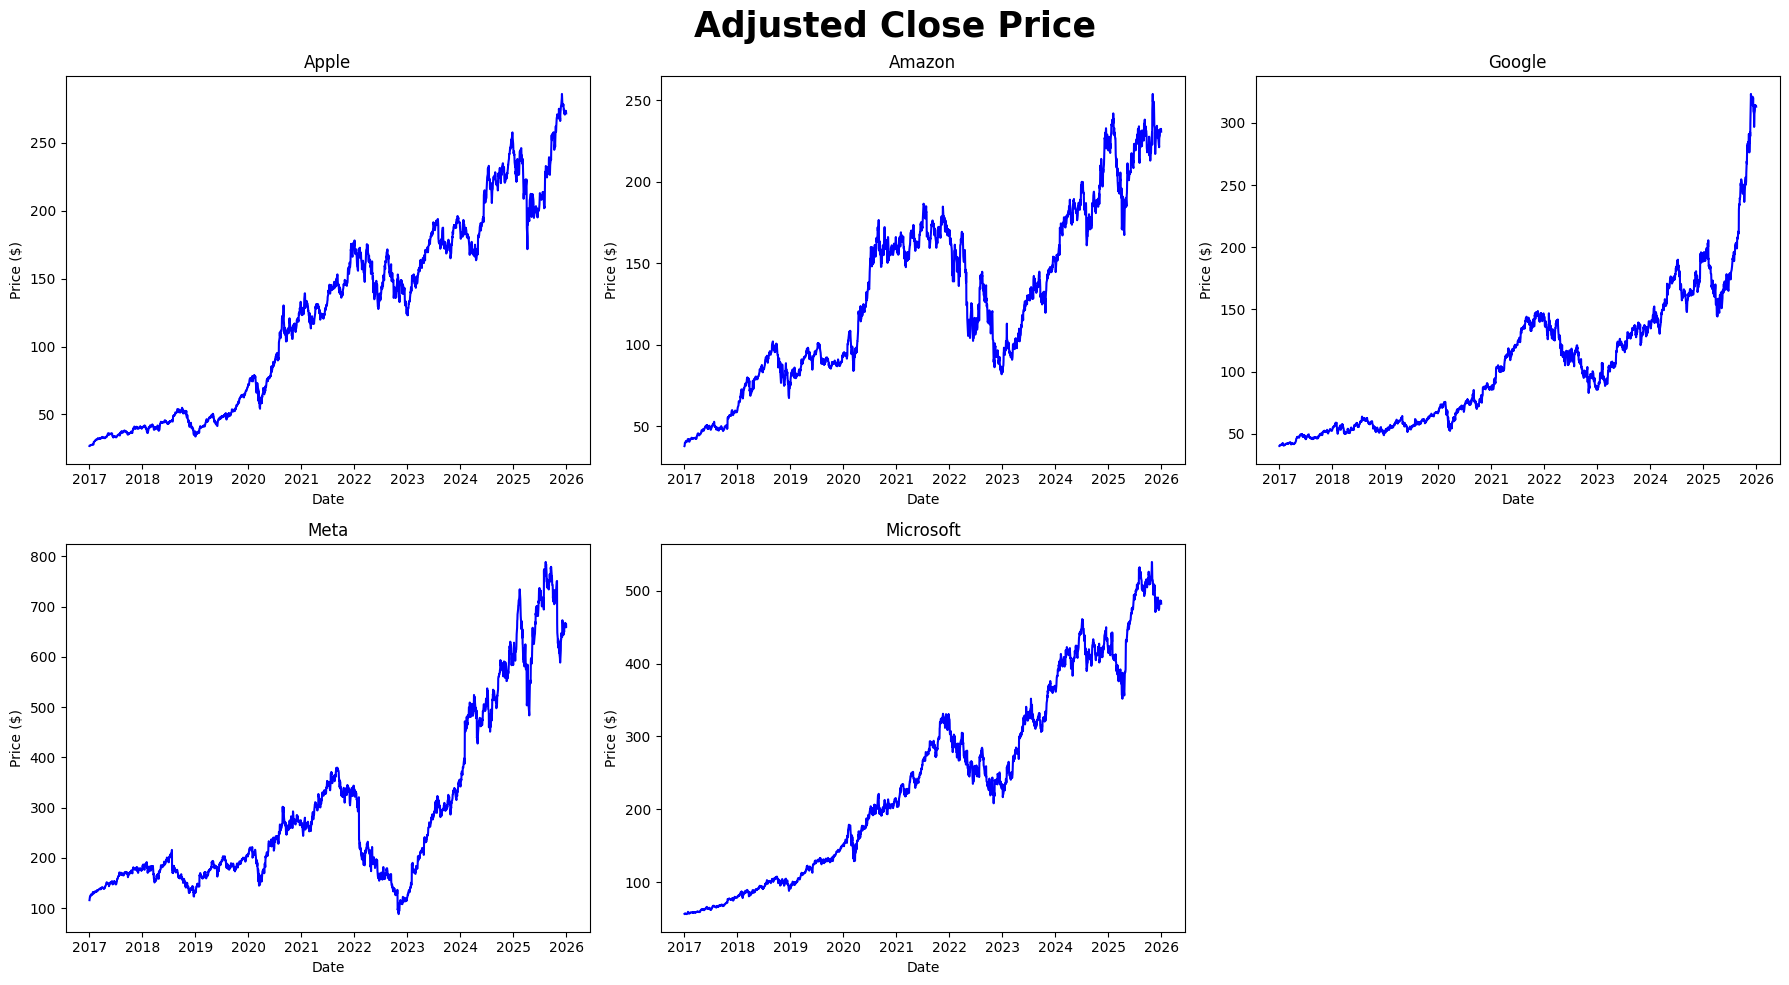

In [57]:
# Create a mapping from company names to ticker symbols
fig, ax = plts.subplots(2, 3, figsize=(18, 10))
ax = ax.flatten()

for i, (company, df) in enumerate(stock_list.items()):
    ticker = company_to_ticker[company]  # Get the ticker symbol
    
    ax[i].plot(df[(ticker, 'Adj Close')], label='Adj Close', color='blue')
    ax[i].set_title(company)
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Price ($)')

fig.delaxes(ax[5])
plts.suptitle('Adjusted Close Price', fontsize=25, fontweight='bold')
plts.tight_layout()
plts.show()

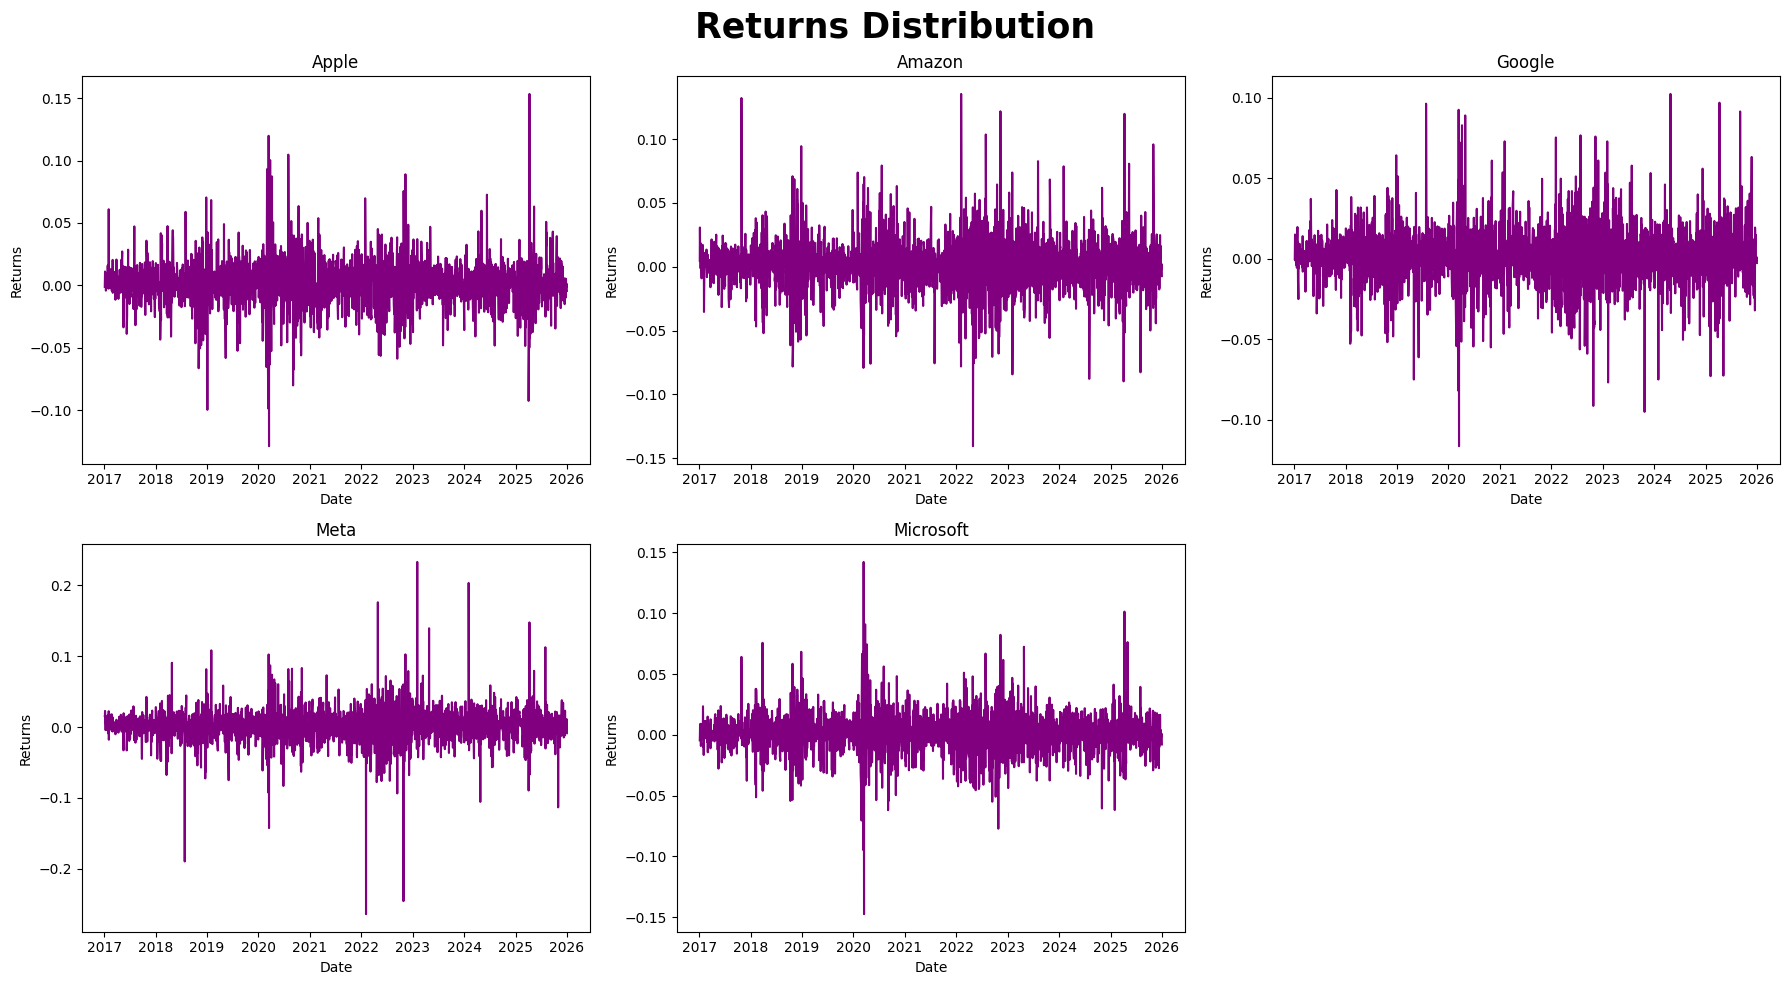

In [62]:
### Histogram to show the returns: 
    
# calculate returns
for company, df in stock_list.items():
    ticker = company_to_ticker[company]
    df[(ticker, 'Returns')] = df[(ticker, 'Adj Close')].pct_change()

### plotting the returns:
fig, ax = plts.subplots(2, 3, figsize=(18, 10))
ax = ax.flatten()

for i, (company, df) in enumerate(stock_list.items()):
    ticker = company_to_ticker[company]  # Get the ticker symbol
    
    ax[i].plot(df[(ticker, 'Returns')], label='Returns', color='purple')
    ax[i].set_title(company)
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Returns')

fig.delaxes(ax[5])
plts.suptitle('Returns Distribution', fontsize=25, fontweight='bold')
plts.tight_layout()
plts.show()

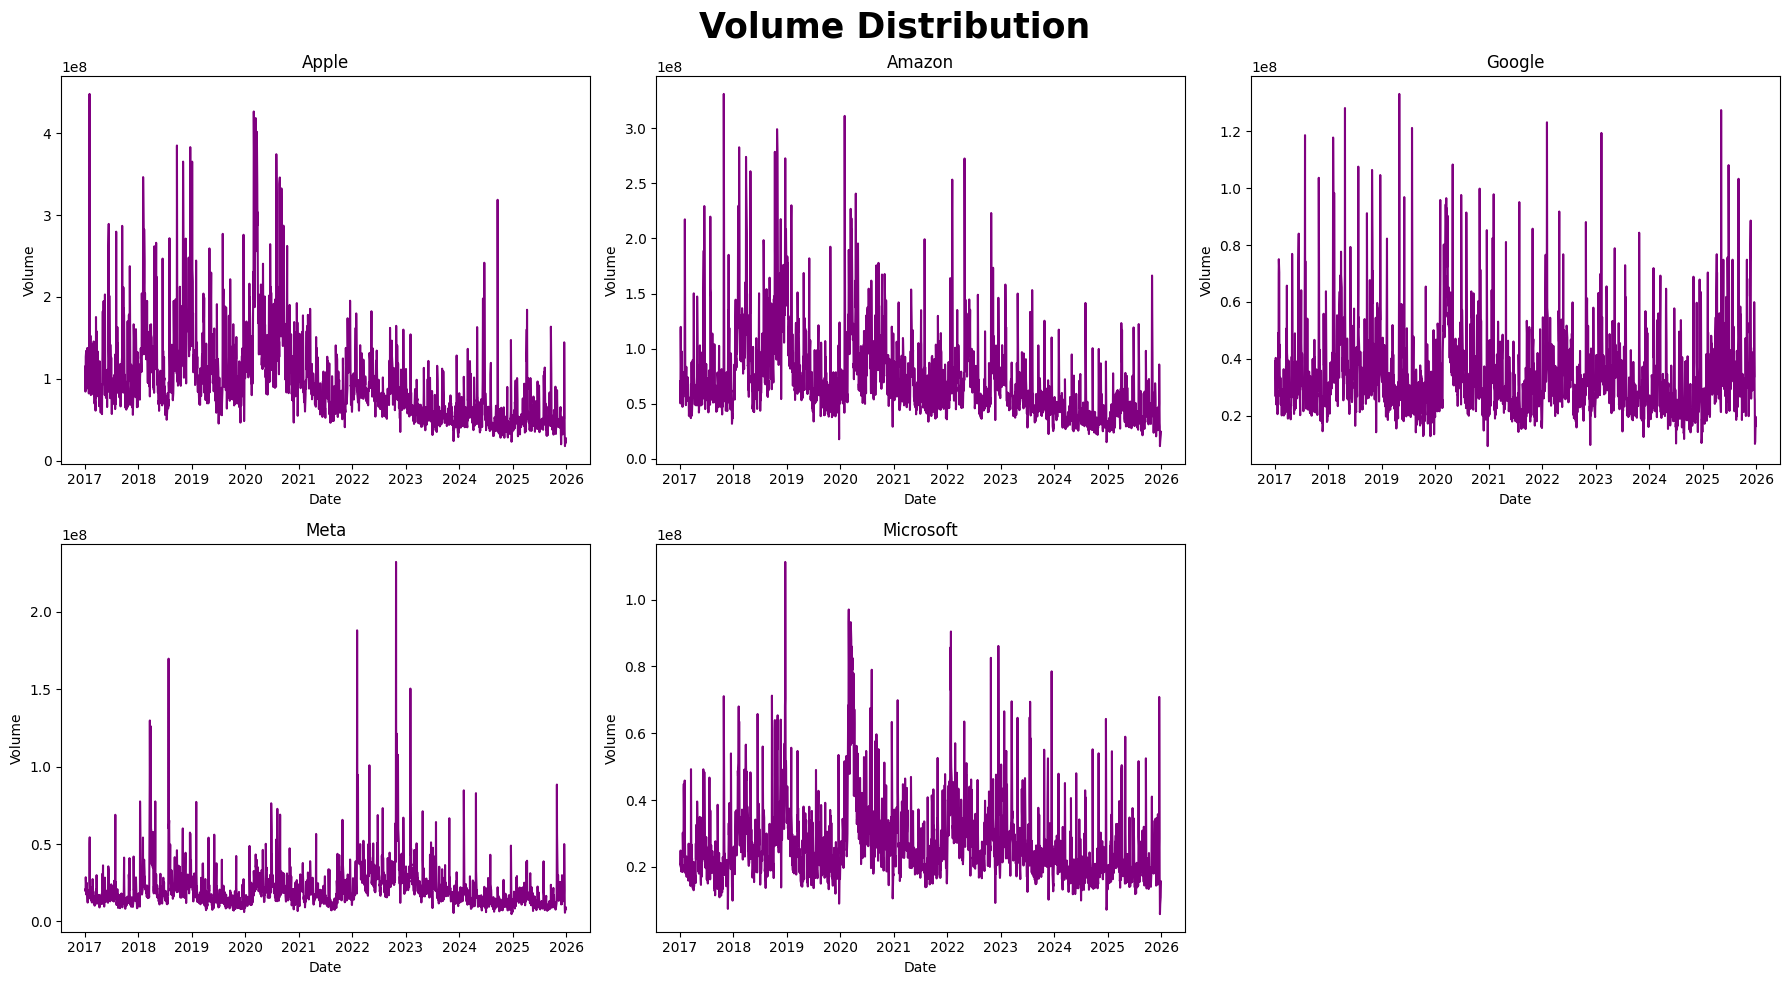

In [65]:
### plotting the Volume:
fig, ax = plts.subplots(2, 3, figsize=(18, 10))
ax = ax.flatten()

for i, (company, df) in enumerate(stock_list.items()):
    ticker = company_to_ticker[company]  # Get the ticker symbol
    
    ax[i].plot(df[(ticker, 'Volume')], label='Volume', color='purple')
    ax[i].set_title(company)
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Volume')

fig.delaxes(ax[5])
plts.suptitle('Volume Distribution', fontsize=25, fontweight='bold')
plts.tight_layout()
plts.show()

Interpretations from the Results: 

1. Adjusted Close Price: 
- Apple
Apple shows a remarkably consistent upward trajectory. While it experienced a notable sideways consolidation period during 2022–2023, it successfully broke out to new highs by 2025. Of the group, its growth appears the most "orderly," maintaining a steady slope with relatively shallow pullbacks compared to its peers.

- Amazon
Amazon’s chart is defined by a heavy "V-shaped" recovery. After a massive surge during the 2020–2021 period, it saw a significant drawdown in 2022 (dropping back toward 2019 levels). However, since 2023, it has aggressively recovered, recently surpassing its previous all-time highs to reach the ~$230+ range.

- Google
Google’s performance was steady until a massive acceleration starting in 2024. Like the others, it hit a plateau in 2022, but the most recent leg of the journey (2025–2026) shows a nearly vertical price spike, suggesting a period of intense valuation growth or a "blow-off top" momentum phase.

- Meta
Meta displays the highest volatility of the group. The chart shows a dramatic "valley" where the price collapsed in 2022 (falling below $100). The subsequent recovery is staggering, with the price 5x-ing to reach nearly $800 by 2026. It is currently the most "extended" chart, showing parabolic growth over the last two years.

- Microsoft
Microsoft exhibits a strong, resilient bull trend. It has the most "stair-step" appearance, where each peak is followed by a higher trough. Its recovery from the 2022 dip was swift, and it has maintained a very high price floor, recently consolidating near its peak of ~$500.

2. Return Distribution: 

- Apple: Apple maintains a relatively tight "band" of returns, usually staying within $\pm 5\%$. However, there are two distinct volatility spikes: one during the 2020 pandemic onset and a more recent, significant positive spike in 2025 (approaching $+15\%$). Outside of these events, it is remarkably consistent, suggesting lower daily "noise" than its peers.

- Amazon: Amazon's distribution shows a higher frequency of moderate swings compared to Apple. You can see several sharp downward spikes reaching $-10\%$ to $-15\%$ throughout the timeline (notably in late 2018 and 2022). It lacks a single massive positive outlier, instead showing a dense, wider "fuzz" of daily movement.

- Google: Google's return profile is the most "compact" of the group. For much of the 2017–2021 period, the returns hugged the zero line very closely. The volatility increased slightly after 2022, but it rarely sees the extreme $\pm 15\%$ swings seen in Apple or Meta, making it appear as the "smoothest" ride in terms of daily percentage changes.

- Meta: Meta is clearly the highest volatility stock in this lineup. The chart is defined by extreme, isolated spikes that go far beyond the others:The 2018 dip: A sharp $-20\%$ drop.The 2022-2023 "Crisis": Multiple massive downward spikes exceeding $-25\%$.The Recovery: Sharp vertical positive spikes as it regained ground.If Apple is a steady heartbeat, Meta is an EKG of a marathon runner in a sprint.

- Microsoft: Microsoft looks very similar to Apple but with a slightly "cleaner" recent history. It had a massive outlier (downward) in early 2020, but from 2023 to 2026, the returns have become very stable, staying mostly within a tight $\pm 2.5\%$ range. This suggests it has become less speculative and more of a "steady-state" performer in recent years.

3. Volume Distribution: 

- Apple: Apple shows a very clear downward trend in volume over the last nine years. Trading activity was highly erratic and peaked frequently between 2017 and 2021 (often exceeding $4 \times 10^8$ shares). Since 2022, the "noise" has dampened significantly, with daily volume now rarely crossing the $2 \times 10^8$ mark, suggesting a shift toward long-term holding rather than active day-trading.
- Amazon: Similar to Apple, Amazon’s volume shows a steady tapering. There were massive liquidity spikes in 2018 and early 2020, but the baseline has drifted lower since 2022. Even the massive price recovery in 2024–2025 (seen in the first set of charts) occurred on relatively lower volume compared to its 2017–2019 levels.
- Google: Google's volume is the most "stable" yet lower-scale of the group. It lacks the massive, skyscraper-like spikes seen in Meta or Apple. Its trading activity has stayed within a relatively consistent range ($0.2 \times 10^8$ to $0.8 \times 10^8$), with only a few outliers. This indicates a very consistent, institutional level of liquidity.
- Meta: Meta’s volume chart is a perfect map of its corporate drama. Unlike the others, Meta saw its highest volume spikes late in the timeline (late 2022 and early 2024). These massive spikes correspond with its price collapse and subsequent "Year of Efficiency" recovery. It is the only stock here where recent conviction (volume) rivaled or exceeded its 2017 levels.
- Microsoft: Microsoft shows a high-activity period around 2020–2022, likely driven by the cloud and AI boom. Since then, its volume has settled into a lower, more predictable channel. Like Apple, the recent price highs are being achieved on much lower relative volume, which often suggests "exhaustion" or simply that shares are tucked away in long-term portfolios.

